In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Part 1 - Prepare SQLAlchemy 

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import create_engine

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [7]:
# Preview the data model in Db Browser or a similar tool
# (do this to get a sense as to how the database is structured)

# Part 2 - Exploratory Climate Analysis

### Station Analysis

In [8]:
# Design a query to show how many stations are available in this dataset?

stations = pd.read_sql("select count(station) as number_of_stations from measurement", conn)
stations

,number_of_stations
0,19550


In [9]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
activestations = pd.read_sql(("select station, count(station) as number_of_stations " 
                                "from measurement group by station "
                                  "order by count(station) desc"), conn)
activestations

,station,number_of_stations
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [10]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

mostactive = pd.read_sql(('select station, min(tobs) as min_obs, max(tobs) as max_obs, round(avg(tobs),2) as ave_obs'
                         ' from measurement where station = "USC00519281"'), conn)
mostactive


,station,min_obs,max_obs,ave_obs
0,USC00519281,54.0,85.0,71.66


In [11]:
# Choose the station with the highest number of temperature observations.

#by sql
maxtobs = pd.read_sql(
    ("select * from "
     "(select station, count(tobs) as number_of_tobs "
     "from measurement group by station "
     "order by 2 desc) "
     "limit 1") , conn)

#by 

In [12]:
 # Query the last 12 months of temperature observation data for this station and plot the results as a histogram
 
tobs_data = pd.read_sql("select station, date, tobs from measurement where station = 'USC00519281' " 
        "and date between (select date(max(date), '-12 month') from measurement) and (select max(date) from measurement) "
        "order by date desc", conn)
tobs_data.head()


,station,date,tobs
0,USC00519281,2017-08-18,79.0
1,USC00519281,2017-08-17,76.0
2,USC00519281,2017-08-16,76.0
3,USC00519281,2017-08-15,77.0
4,USC00519281,2017-08-14,77.0


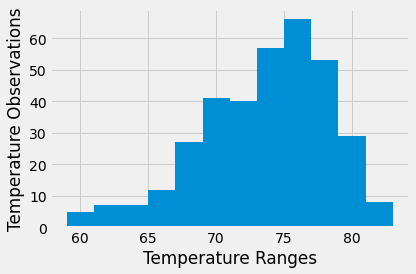

In [13]:
# Plot the results as a histogram with `bins=12`.
x = tobs_data['tobs']
plt.hist(x, density=False, bins=12)
plt.ylabel('Temperature Observations')
plt.xlabel('Temperature Ranges')
plt.tight_layout()
plt.show()


### Precipitation Analysis

In [14]:
# Design a query to retrieve the last 12 months of precipitation data.

# Select only the `date` and `prcp` values.

prcp_data = pd.read_sql("select date, prcp from measurement where prcp <> 0.00 and date between"
                        "(select date(max(date), '-12 month') from measurement) and (select max(date) from measurement) "
                        "order by date desc", conn)
prcp_data.head()

,date,prcp
0,2017-08-23,0.08
1,2017-08-23,0.45
2,2017-08-22,0.50
3,2017-08-21,0.02
4,2017-08-21,0.56


In [37]:
#Load the query results into a Pandas DataFrame and set the index to the date column.

#Sort the DataFrame values by `date`.

prcp_df = pd.DataFrame(prcp_data)
prcp_df = prcp_df.sort_values('date', ascending=True)
prcp_df = prcp_df.set_index('date')
prcp_df.head()

,prcp
date,
2016-08-23,0.70
2016-08-23,0.15
2016-08-23,1.79
2016-08-23,0.02
2016-08-23,0.05


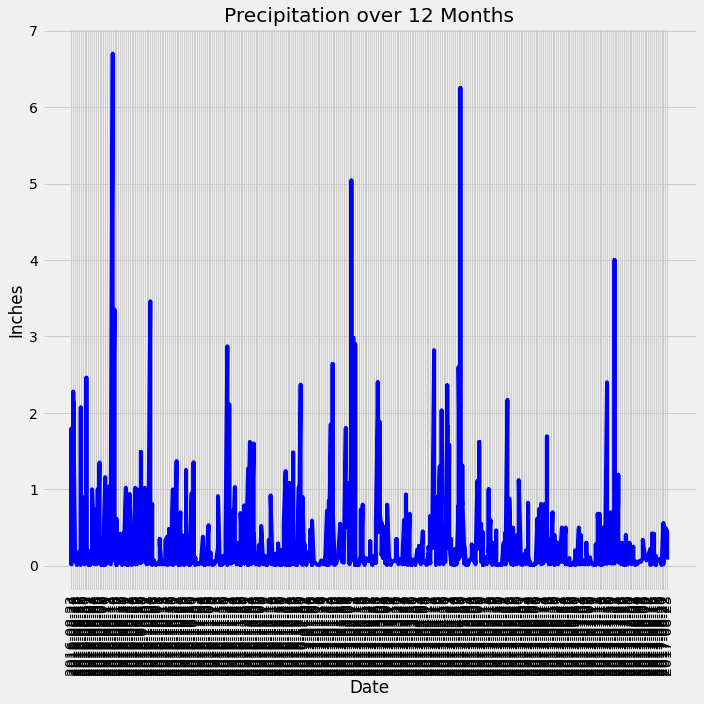

In [42]:
# Plot the results using the DataFrame `plot` method.
plt.figure(figsize=(10,10))

x=prcp_df.index
prcp_pl, = plt.plot(x, prcp_df['prcp'], color = 'b')
plt.ylabel('Inches')
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.title('Precipitation over 12 Months')
plt.tight_layout()
plt.show()

In [20]:
# Use Pandas to print the summary statistics for the precipitation data.
prcp_df.prcp.describe()

count    1147.000000
mean        0.312363
std         0.576781
min         0.010000
25%         0.030000
50%         0.100000
75%         0.310000
max         6.700000
Name: prcp, dtype: float64

## Part 3 - Data Analysis Assignment

Temperature Analysis I


#Hawaii is reputed to enjoy mild weather all year. Is there a meaningful difference between the temperature in, for example, June and December?
#You may either use SQLAlchemy or pandas's read_csv() to perform this portion.

In [ ]:
#Identify the average temperature in June at all stations across all available years in the dataset. 
#Do the same for December temperature.

select ave(tobs) from measurement where date like select extract(Month, date) = 


In [ ]:
#Use the t-test to determine whether the difference in the means, if any, is statistically significant. 
#Will you use a paired t-test, or an unpaired t-test? Why?


In [17]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
import datetime
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
       
    # your code here 
    engine = create_engine("sqlite:///Resources/hawaii.sqlite")
    conn = engine.connect()
    
    query = f"select max(tobs) as TMAX, min(tobs) as TMIN, round(avg(tobs),2) as TAVE \
                from measurement where date between '{start_date}' and '{end_date}'"
    sd = pd.read_sql(query, conn)
    
    return sd    
        

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

   TMAX  TMIN   TAVE
0  74.0  62.0  69.57


In [18]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date = '2017-07-31'
end_date = '2017-08-15'
print(calc_temps('2017-07-31','2017-08-15'))

   TMAX  TMIN   TAVE
0  84.0  70.0  78.85


In [19]:
#place function results into a dataframe
temps_df = calc_temps('2017-07-31','2017-08-15')

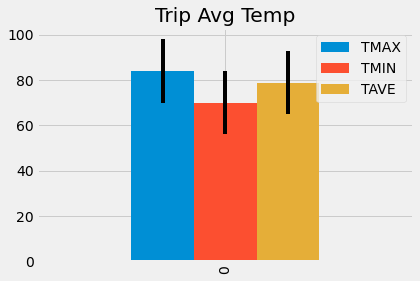

In [23]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

temps_df.plot(kind='bar', yerr = [temps_df['TMAX'] - temps_df['TMIN']])

plt.title("Trip Avg Temp")
#plt.errorbar(x, y, xerr=0.4, yerr)
#errorbar(x,y, yerr, marker='s', mfd='red', mec = 'green', ms=20, mew=4)

plt.show()

In [50]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

trip_start = '2017-08-05'
trip_end = '2017-08-30'

rainfall = pd.read_sql(
    ("select s.station, s.name, s.latitude, s.longitude, s.elevation, sum(m.prcp) as total_rainfall_amount \
        from measurement m \
        join station s on m.station = s.station \
        where m.date between '{trip_start}' and '{trip_end}' \
        group by s.station, s.name, s.latitude, s.longitude, s.elevation \
        order by 6 desc"), conn)
rainfall

,station,name,latitude,longitude,elevation,total_rainfall_amount


In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [45]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A DataFrame containing the daily normals, tmin, tavg, and tmax
    
    """
    
    # your code here
    engine = create_engine("sqlite:///Resources/hawaii.sqlite")
    conn = engine.connect()
    
    query = f"select * from measurement where date like '%%{date}'"
    minquery = f"select min(tobs) from measurement where date like '%%{date}'"
    maxquery = f"select max(tobs) from measurement where date like '%%{date}'"
    avequery = f"select ave(tobs) from measurement where date like '%%{date}'"
    
    sd = pd.read_sql(query, conn)
        
    return sd
    
daily_normals("01-01")

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,331,USC00519397,2011-01-01,0.00,69.0
2,675,USC00519397,2012-01-01,0.00,63.0
3,1037,USC00519397,2013-01-01,0.02,71.0
4,1402,USC00519397,2014-01-01,0.00,66.0
5,1765,USC00519397,2015-01-01,0.00,63.0
6,2129,USC00519397,2016-01-01,0.00,62.0
7,2495,USC00519397,2017-01-01,0.00,62.0
8,2725,USC00513117,2010-01-01,0.28,67.0
9,3087,USC00513117,2011-01-01,0.42,69.0


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
